# <center><h1>Titanic Data Analysis </h1></center>

# Introduction
<i>"The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class."</i>

# About the Data 

#### **These values explain the values found in the Titanic data file.**


##### Variable Descriptions

+ survival----Survival (0 = No, 1 = Yes)
+ pclass------Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
+ sex---------Sex	
+ Age---------Age in years	
+ sibsp-------# of siblings / spouses aboard the Titanic	
+ parch-------# of parents / children aboard the Titanic	
+ ticket------Ticket number	
+ fare--------Passenger fare	
+ cabin-------Cabin number	
+ embarked----Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)

##### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 <br>

sibsp: The dataset defines family relations in this way...<br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife (mistresses and fiancés were ignored)<br>

parch: The dataset defines family relations in this way...<br>
Parent = mother, father <br>
Child = daughter, son, stepdaughter, stepson <br>
Some children travelled only with a nanny, therefore parch=0 for them.<br>

In [1]:
# Importing numpy, pandas, and additional libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Render plots and graphs inline
%matplotlib inline

In [2]:
# Read Titanic Data and create dataframe
titanic_data = pd.read_csv('titanic-data.csv')

In [3]:
# Print first 5 rows of Titanic data 
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Print info about the dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Questions Regarding the Data

Now that we have viewed a small sample of the Titanic data we will be working with, here are a few questions I think should be investigated:
+ What effect did social class have on survival rate?
+ What were the chances of survival based strictly on age?
+ How likely were children (< 18) to survive compared to passengers who were adults?

# Cleaning the Data

To start, we will clean the data by removing columns from our dataframe that will have no use in our analysis. 

In [5]:
# Removing unwanted data by creating a new dataframe titled titanic_clean
titanic_clean = titanic_data.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked', 'Parch'], axis=1)

In [6]:
# Viewing first 5 rows of data from new dataframe to make sure the data looks clean
titanic_clean.head()

,Survived,Pclass,Sex,Age,SibSp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


In [7]:
# Now that we have a new dataframe with our desired columns, we will run some code to find any missing values
titanic_clean.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
dtype: int64

This is showing us that there are 177 instances that result in "Nan" values in our 'Age' column. We will further investigate to see if it is skewed by some metric.

In [8]:
# Creating a sample of our missing Age inputs
missing_age_data = pd.isnull(titanic_clean['Age'])
titanic_clean[missing_age_data].head()

,Survived,Pclass,Sex,Age,SibSp
5,0,3,male,NaN,0
17,1,2,male,NaN,0
19,1,3,female,NaN,0
26,0,3,male,NaN,0
28,1,3,female,NaN,0


In [9]:
# Viewing last 5 records for missing Age inputs
titanic_clean[missing_age_data].tail()

,Survived,Pclass,Sex,Age,SibSp
859,0,3,male,NaN,0
863,0,3,female,NaN,8
868,0,3,male,NaN,0
878,0,3,male,NaN,0
888,0,3,female,NaN,1


In [10]:
# Separating the number of males and females with missing 'Age' values
missing_age_female = titanic_clean[missing_age_data]['Sex'] == 'female'
missing_age_male = titanic_clean[missing_age_data]['Sex'] == 'male'

print 'Number of females missing age data: {}'.format(missing_age_female.sum())
print 'Number of males missing age data: {}'.format(missing_age_male.sum())

Number of females missing age data: 53
Number of males missing age data: 124


177 of our 'Age' values are missing. If this was a large dataset we could just delete those rows without much consequence, however due to the fact that we have less than 1000 records, I will replace all "NaN" (Not a number) values with the median age value. The reason I am using the median instead of the mean is because unless there is a perfectly normal distribution, the median is the best representation for our intended purposes.

In [26]:
# We will replace the NaN values with the median 'Age' value 

age_median = titanic_clean['Age'].median()
titanic_clean['Age'] = titanic_clean['Age'].fillna(age_median)

In [27]:
# Next, we will take a look at some descriptive stats of our data to make sure we have all the records
titanic_clean.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Age_categories
count,891.000000,891.000000,891,891.000000,891.000000,891
unique,NaN,NaN,2,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,Adult
freq,NaN,NaN,577,NaN,NaN,678
mean,0.383838,2.308642,NaN,29.361582,0.523008,NaN
std,0.486592,0.836071,NaN,13.019697,1.102743,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,NaN


Now that we updated our NaN age values, we have 891 complete records to analyze.

# Question 1
### What effect did social class have on survival rate?


First, we will get the counts for each class (Pclass), along with total male and female count.

In [13]:
# Total count for each class
titanic_clean.groupby(['Pclass'])[['Survived']].count()

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
titanic_clean.groupby(['Sex'])[['Survived']].count()

,Survived
Sex,
female,314
male,577


It seems that based on the available data, we have records for 577 male passengers along with 314 female passengers.

In [15]:
# Total count for each class, split into male/female
class_sex_count = titanic_clean.groupby(['Pclass', 'Sex'])[['Survived']].count()
print class_sex_count

               Survived
Pclass Sex             
1      female        94
       male         122
2      female        76
       male         108
3      female       144
       male         347


This data tells us that the most common passenger was a 3rd class male. Based on this, we may want to assume that the most common survivor would be a 3rd class passenger, since they account for the largest portion of passengers based on class. Let's take a look at survival rates based on social class.

In [16]:
# Grouping a few elements to get a basic look at the mean survival for each class (Pclass)
titanic_clean.groupby(['Pclass'])[['Survived']].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


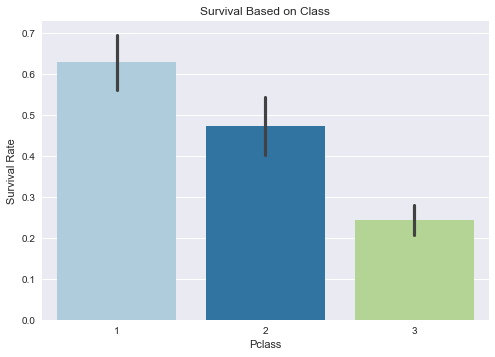

In [17]:
# Bar plot for survival data based on class
sns.set(style="darkgrid")
class_survive = sns.barplot(data=titanic_clean,x='Pclass', y="Survived", palette="Paired")
class_survive.set(xlabel='Pclass', ylabel='Survival Rate', title="Survival Based on Class")
sns.plt.show()

From this data, it seems as if people in the highest socio-economic class had the highest rate of survival. Let's break it down a little further and view the data with male and female separate for each class.

In [18]:
# Adding in an additional element of male and female
class_sex_survived = titanic_clean.groupby(['Pclass' , 'Sex'])[['Survived']].count()
print class_sex_survived

               Survived
Pclass Sex             
1      female        94
       male         122
2      female        76
       male         108
3      female       144
       male         347


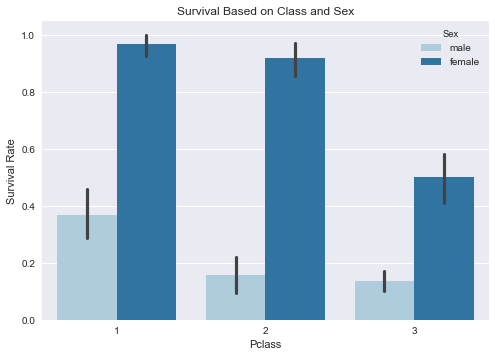

In [19]:
# Bar graph 
sns.set(style="darkgrid")
class_survive = sns.barplot(data=titanic_clean, x='Pclass', y='Survived', hue="Sex", palette="Paired")
class_survive.set(xlabel='Pclass', ylabel='Survival Rate', title='Survival Based on Class and Sex')
sns.plt.show()


From this data we can conclude that if you were a **first class passenger**, you were at least **2.5x as likely to survive** compared to a passenger of the lowest socio-economic class. This data could represent the sad truth that in *most* situations, *people in the lowest socio-economic class get the short end of the stick*. However, another explanation could also be that more expensive cabins could have had a better location inside the Titanic, therefor giving these passengers a quicker escape route, and in turn a higher likelihood of survival.

# Question 2
## What were the chances of survival based strictly on age?
For this question, first we will look at the average age of survivor (male/female), as well as the youngest and oldest survivor.

In [20]:
# Finding the passengers that survived and printing a few descriptive stats
survivors_ages = titanic_clean[titanic_clean["Survived"] == 1]["Age"]
print survivors_ages.mean()
print survivors_ages.min()
print survivors_ages.max()

28.2914327485
0.42
80.0


From this result we can see that the average age of a survivor is **28 years old.** Also the youngest survivor was **less than 1** year old, and the oldest survivor was **80 years old!**<br>

Next, to get a more full picture of survivor's age, I'll show a plot of survival rate based on age.

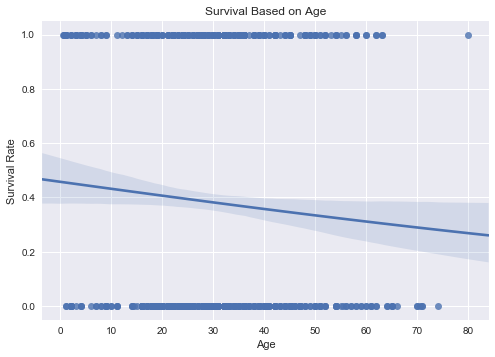

In [21]:
sns.set(style="darkgrid")
class_survive = sns.regplot(data=titanic_clean , x='Age', y="Survived", logistic=True)
class_survive.set(xlabel='Age', ylabel='Survival Rate', title="Survival Based on Age")
sns.plt.show()

This regression plot shows a trend of decreasing likelihood of survival as age increases.

# Question 3
## How likely were children (< 18) to survive compared to passengers who were adults?
To answer this question, we will divide passengers into three new categories. The first will be children under 18 years of age. The second will be passengers who are 18 years of age up to 49 years of age. Last, we will also add a section for seniors aged 50+. After that, we will view how likely each group is to survive.


In [22]:
# Defining different age categories
titanic_clean['Age_categories'] = pd.cut(titanic_clean['Age'], bins=[0,18,49,90], labels=["Child","Adult","Senior"])


Next, we will view the count for each individual age group.

In [23]:
# Viewing the count of each age category
titanic_clean.groupby(['Age_categories']) [['Survived']].count()


,Survived
Age_categories,
Child,139
Adult,678
Senior,74


Next, we will view the mean of survival for each age group.

In [24]:
# Calculating mean survival for age categories
titanic_clean.groupby(['Age_categories']) [['Survived']].mean()

,Survived
Age_categories,
Child,0.503597
Adult,0.361357
Senior,0.364865


[<matplotlib.text.Text at 0xc9af240>, <matplotlib.text.Text at 0xc65f4a8>]

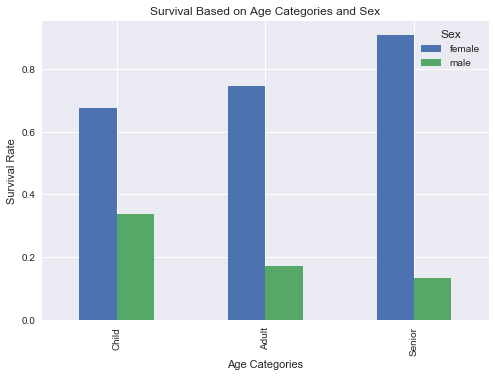

In [25]:
# Bar plot for survival based on age categories as well as sex
age_sex = titanic_clean.groupby(['Age_categories', 'Sex']) ['Survived'].mean().unstack().plot(kind='bar', title="Survival Based on Age Categories and Sex")
age_sex.set(ylabel="Survival Rate", xlabel="Age Categories")

Based on our findings from dividing the passengers into age groups, we found that children had a 50% chance of survival, passengers aged 18-49 had a 36% chance of survival, and seniors aged 50+ also had a 36% chance of survival. <br><br>
A trend that I find very interesting is that once we broke the data down further to include sex, we can see that **females** become *more likely to survive as the ages progress up to senior*, however **males** have an opposite downward trend where they are *more likely to survive the younger they are.*

# Conclusion
We were able to find out a number of interesting trends based on our Titanic data sample. It is always said that women and children should always be the first to be saved in times of tragedy, and this data definitely adds validity to that statement. 
<br><br>
It was interesting to see that people with the most **expensive tickets** were over **2.5x more likely to survive** than a passenger of the lowest class. However, this could be due to first class cabins being located at an area of the ship that would have had easier access to exits, or another factor that we aren't aware of.
<br><br>
We had a few limitations with our Titanic dataset that most likely had an impact on our findings. One of the main limitations is that although there were 2224 passengers on board the Titanic before it crashed, we only had records available for 891 of these passengers, or roughly 1/3 of the total passengers. Something else to take into account for our dataset is the question of why or how were these 891 records selected out of the total? Was there a bias in the selection of these records? For a more complete picture, we would need to have the records for all 2224 passengers.

# Sources:
https://www.kaggle.com/c/titanic <br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html
https://gallery.cortanaintelligence.com/Experiment/Methods-for-handling-missing-values-1
